Домашнее задание по классификации и детекции изображений. Свой код отметил комментарием `# my code` в начале ячейки

# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационными данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
import PIL
# You may add any imports you need

In [ ]:
! wget https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/BNR41Vu3y0c7qA && unzip BNR41Vu3y0c7qA > /dev/null

--2020-11-22 14:24:35--  https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/BNR41Vu3y0c7qA
Resolving getfile.dokpub.com (getfile.dokpub.com)... 78.46.92.107
Connecting to getfile.dokpub.com (getfile.dokpub.com)|78.46.92.107|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://downloader.disk.yandex.ru/disk/f3e6726e5babda31f2f8bc13078ec44866e2a7963b7b3bbe4d03750b0e0a122f/5fbaace4/_YfpybMoWZm47imviby-3WqJN6rDbfJY7vCqrcpx6a1QDycbma4FNV4faVohaeNZIqn9UfsmyNsUMG-JPSYUBw%3D%3D?uid=0&filename=dataset.zip&disposition=attachment&hash=CClX9nIlL8KQANqWD4dwCf9o1x0Vsbna0uaI97hmp0%2BQ97ps8BfR0%2BOPTj%2BwDHN3q/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=365556915&fsize=220318689&hid=7a4d50b29200d866f74e5c022ad9cea5&media_type=compressed&tknv=v2 [following]
--2020-11-22 14:24:36--  https://downloader.disk.yandex.ru/disk/f3e6726e5babda31f2f8bc13078ec44866e2a7963b7b3bbe4d03750b0e0a122f/5fbaace4/_YfpybMoWZm47imviby-3WqJN

In [ ]:
# my code
train_transform = torchvision.transforms.Compose([
    #torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    #torchvision.transforms.RandomHorizontalFlip(),
    #torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
    torchvision.transforms.ToTensor()
])
val_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/train", transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

In [ ]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [ ]:
# my code
def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    model.train()
    loss_train = []
    accuracy_train = 0

    for imgs, labels in tqdm(train_dataloader):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        y_pred = model(imgs)
        output = criterion(y_pred, labels)
        output.backward()
        optimizer.step()

        loss_train.append(output.item())

    return loss_train

In [ ]:
# my code
def predict(model, val_dataloder, criterion, device="cuda:0"):
    model.eval()
    losses, predicted_classes, true_classes = [], [], []

    for imgs, labels in tqdm(val_dataloder):
        imgs, labels = imgs.to(device), labels.to(device)
        ypred = model(imgs)
        losses.append(criterion(ypred, labels).item())
        predicted_classes += ypred.argmax(1).tolist()
        true_classes += labels.tolist()

    return losses, predicted_classes, true_classes

In [ ]:
# my code
def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    model.to(device)
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        loss_train = train_one_epoch(model, train_dataloader, criterion, optimizer, device)
        losses, predicted_classes, true_classes = predict(model, val_dataloader, criterion, device)
        scheduler.step()
        
        print('Accuracy:', accuracy_score(true_classes, predicted_classes))

        fig, ax = plt.subplots(1, 2, figsize=[8, 4])
        ax[0].plot(np.arange(len(loss_train)), loss_train)
        ax[1].plot(np.arange(len(losses)), losses)
        plt.show()
        print('\n')
        # Train, evaluate, print accuracy, make a step of scheduler or whatever you want...
        

In [ ]:
from torchvision.models import vgg13_bn

In [ ]:
# my code
model = vgg13_bn(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.classifier[6] = nn.Linear(4096, 200)

optimizer = torch.optim.SGD(model.classifier[6].parameters(), lr=1e-2, momentum=0.9, nesterov=True)
train_dataloader = DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=2
)
val_dataloader = DataLoader(
    val_dataset, batch_size=128, num_workers=2
)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
n_epochs = 3
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model.to(device);

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")


tests passed


Запустить обучение можно в ячейке ниже.

Epoch 0



Accuracy: 0.4171


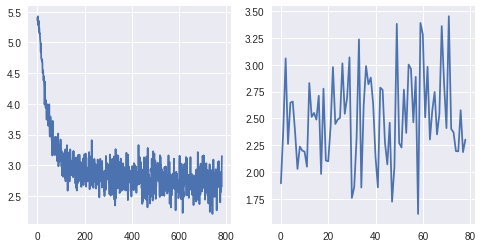



Epoch 1



Accuracy: 0.4341


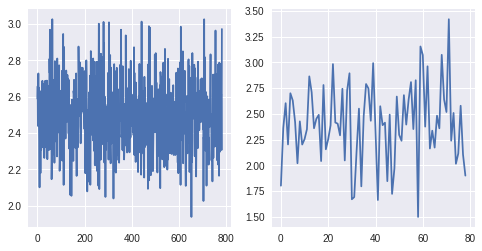



Epoch 2



Accuracy: 0.4408


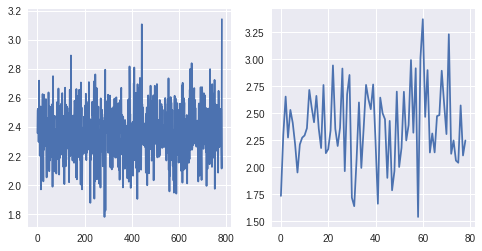

In [ ]:
# my code
torch.manual_seed(234)
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler=scheduler)

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))


Оценка за это задание составит 5 баллов


__Ваш отчёт о проделанных экспериментах__: текст писать тут

Главный вывод, который я сделал из этой части домашки, это то, что я лох. 2 вечера безуспешно учил модели с `lr=1e2`, то есть 100!!!, просто забыл там минус. Получилось, кстати, в районе 0.3 аккураси, можно мне за это бонусный балл?)

А если серьезно, то сразу же решил файнтьюнить готовые модели и начал с резнета. Когда досадное недоразумение с lr было исправлено, сначала подобрал под него оптимайзер - бодрее всего работал SGD, а Адам и RMSProp были не столь успешны. Затем за несколько подходов подобрал параметры для SGD.

В итоге с самой мощной версией резнета (ResNet-152) получилась аккураси 0.4. Затем просто решил попробовать какую-нибудь другую сеть, и на рандоме взял VGG-13 with batch normalization с тем же оптимайзером и scheduler'ом (уменьшал lr в 2 раза каждую эпоху).
И он сразу дал за 3 эпохи необходимое качество. Победа!

Насчет гуглежа - найти как улучшить качество абстрактной нейронной сети оказалось не так просто, как загуглить ошибку в питоне, я посмотрел пару статей, однако ничего полезного не вынес. Так что все проделанные телодвижения были исключительно по мотивам лекций и семинаров:)

Еще пара интересных моментов:

- аугментации не помогают (по крайней мере семинарские) для этого датасета

- надращивать на конце нейронной сети что-то сложнее одного полносвязного слоя не имеет смысла, оно не учится :)

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm

In [ ]:
# we will need this library to process the labeling
! pip install xmltodict
# установка исправляет дикую ошибку, когда albumentations не видит модуль pytorch
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

albumentations==0.5.1 is successfully installed


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensor
import xmltodict, json

Датасет мы за вас написали.

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.metrics import auc
# add any imports you need

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [ ]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in tqdm(enumerate(test_loader)):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    try:  # последствия охоты на баги
        if results[0]["TP"] == 1:
            acc_TP[0] = 1
        else:
            acc_FP[0] = 1

        for i in range(1, len(results)):
            acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
            acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

            precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
            recall[i] = acc_TP[i] / nbr_boxes
        
        return auc(recall, precision)
    except IndexError:
          print('Модель ничего не нашла:(')
          return 0

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

In [ ]:
# my code
def train_one_epoch(model, train_dataloader, optimizer, device):
    model.train()
    n = 0
    global_loss = 0
    for batch, (images, targets) in tqdm(enumerate(train_dataloader)):
        images = list(image.to(device).float() for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        dict_loss = model(images, targets)
        losses = sum(loss for loss in dict_loss.values())
        try:
            assert not torch.isnan(losses)
        except AssertionError:
            print(batch)
            raise AssertionError

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        n += 1
        global_loss += float(losses.cpu().detach().numpy())

        if n % 10 == 0:
            print("Loss value after {} batches is {}".format(n, round(global_loss / n, 2)))

    return global_loss


def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        a = evaluate(model, val_dataloader, device=device)
        print(f"AUC ON TEST: {a:.4f}")
        if a >= 0.91:
          print('Win!')
          break
        train_one_epoch(model, train_dataloader, optimizer, device=device)

In [ ]:
! wget https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/UPwQB7OZrB48qQ && unzip UPwQB7OZrB48qQ > /dev/null

In [ ]:
# my code
def collate_fn(batch):
    return tuple(zip(*batch))

from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [ ]:
# my code
train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    ToTensor()
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))
val_transform = A.Compose([
    ToTensor()
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))
# HINT: TRAIN TRANSFORM OBVIOUSLY SHOULD BE HARDER THAN THOSE FOR VALIDATION

train_dataset = FruitDataset("./train_zip/train", transform=train_transform)
val_dataset = FruitDataset("./test_zip/test", transform=val_transform)

model = fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 4)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, nesterov=True, weight_decay=0.0005)

train_dataloader = DataLoader(
    train_dataset, batch_size=2, shuffle=True, num_workers=4, collate_fn=collate_fn
    )
val_dataloader = DataLoader(
    val_dataset, batch_size=1, shuffle=False, num_workers=4, collate_fn=collate_fn
    )
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

n_epochs = 3
model.to(device)
torch.manual_seed(234)
train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



AUC ON TEST: 0.0003


Loss value after 10 batches is 0.71
Loss value after 20 batches is 0.55
Loss value after 30 batches is 0.52
Loss value after 40 batches is 0.52
Loss value after 50 batches is 0.46
Loss value after 60 batches is 0.43
Loss value after 70 batches is 0.42
Loss value after 80 batches is 0.42
Loss value after 90 batches is 0.4
Loss value after 100 batches is 0.39
Loss value after 110 batches is 0.38
Loss value after 120 batches is 0.37



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



AUC ON TEST: 0.8269


Loss value after 10 batches is 0.28
Loss value after 20 batches is 0.24
Loss value after 30 batches is 0.24
Loss value after 40 batches is 0.2
Loss value after 50 batches is 0.21
Loss value after 60 batches is 0.21
Loss value after 70 batches is 0.21
Loss value after 80 batches is 0.21
Loss value after 90 batches is 0.21
Loss value after 100 batches is 0.21
Loss value after 110 batches is 0.21
Loss value after 120 batches is 0.21



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru


AUC ON TEST: 0.8983


Loss value after 10 batches is 0.23
Loss value after 20 batches is 0.22
Loss value after 30 batches is 0.2
Loss value after 40 batches is 0.2
Loss value after 50 batches is 0.19
Loss value after 60 batches is 0.19
Loss value after 70 batches is 0.19
Loss value after 80 batches is 0.18
Loss value after 90 batches is 0.18
Loss value after 100 batches is 0.18
Loss value after 110 batches is 0.18
Loss value after 120 batches is 0.18



__Выведите итоговое качество модели__.

In [ ]:
auc = evaluate(model, val_dataloader, device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * auc / 0.91)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru


Оценка за это задание составит 4 баллов


Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

In [ ]:
from PIL import ImageDraw
n1, n2 = np.random.choice(60, size=2)
image1, labels1 = val_dataset[n1]
pred1 = model(image1.unsqueeze(0).to(device))[0]
image2, labels2 = val_dataset[n2]
pred2 = model(image2.unsqueeze(0).to(device))[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


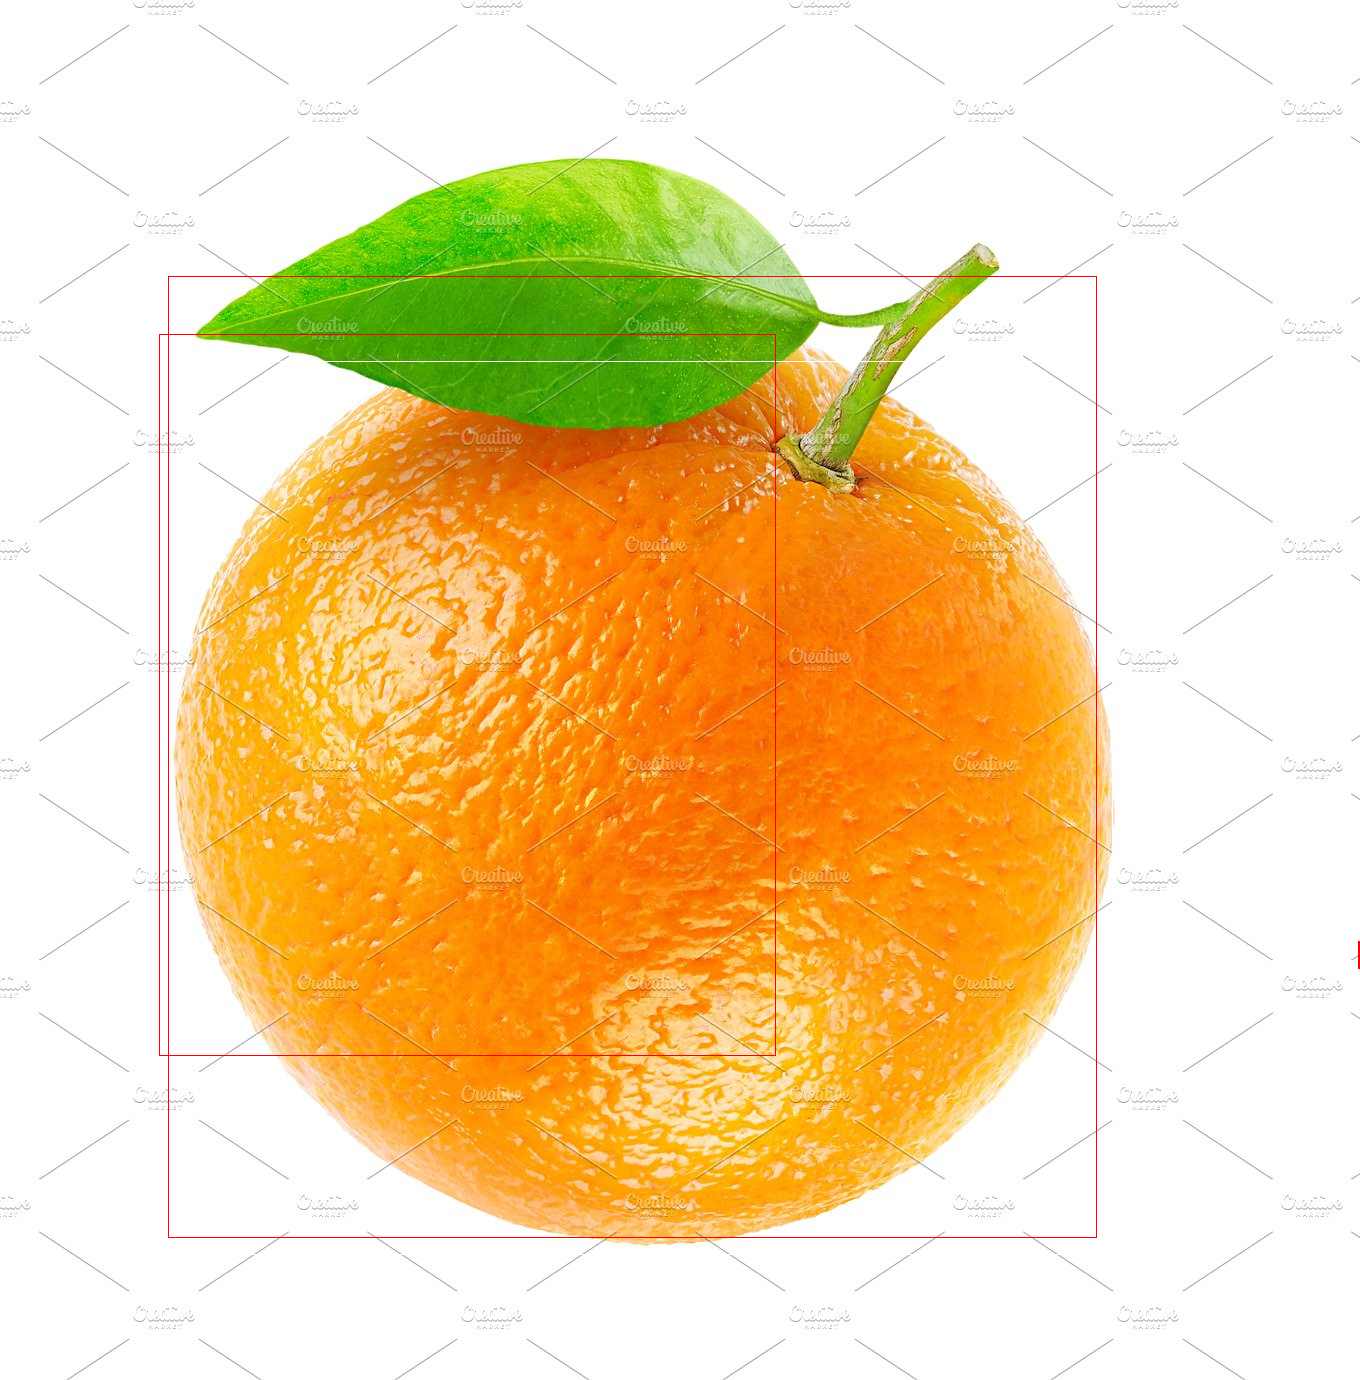

In [ ]:
# my code
image1 = torchvision.transforms.ToPILImage()(image1)
draw = ImageDraw.Draw(image1)
for box in labels1['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred1['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')

image1

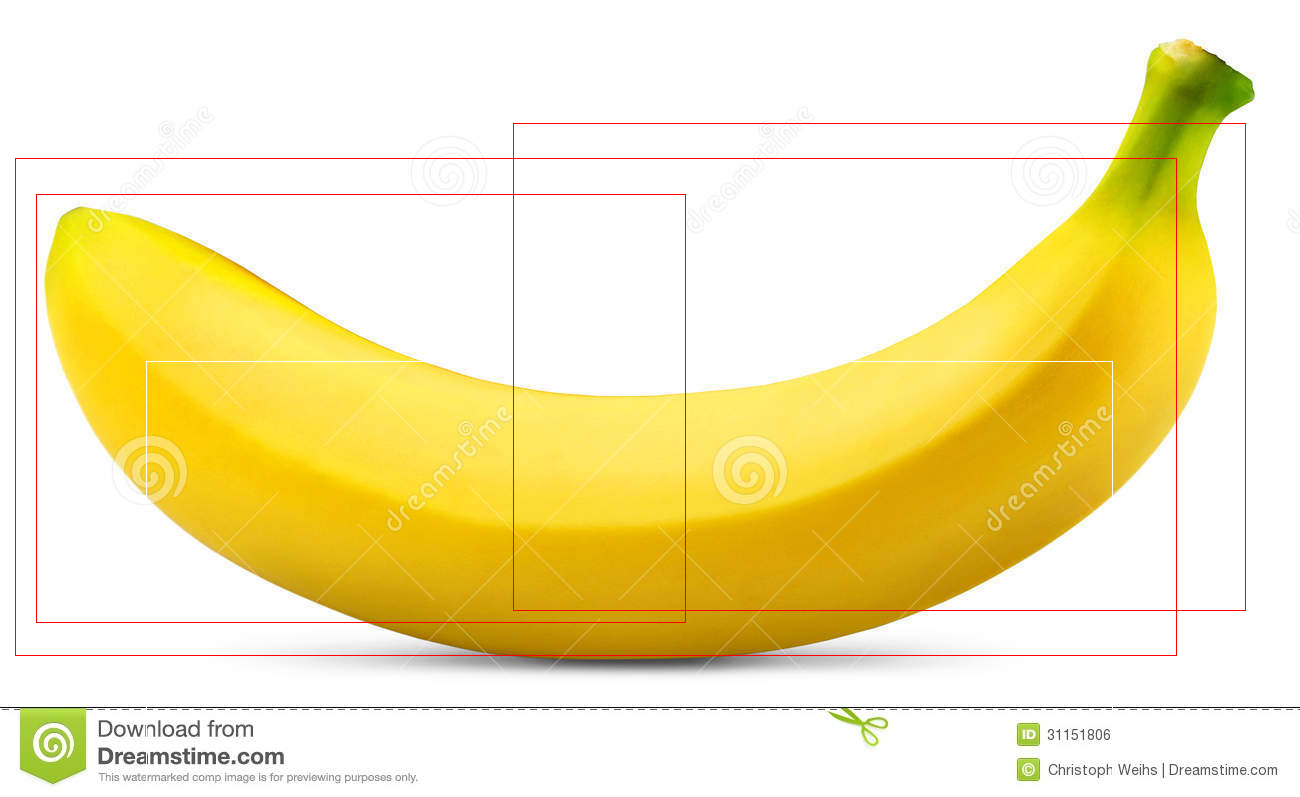

In [ ]:
# my code
image2 = torchvision.transforms.ToPILImage()(image2)
draw = ImageDraw.Draw(image2)
for box in labels1['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred2['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')

image2

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.

По мотивам моих приключений в первой части домашки

![](https://drive.google.com/uc?export=view&id=1y18Z0CYkrD9-wy_QCFftaNIcOxqbGHLQ)

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.

Понравилась идея оценки за качество - без вопросов по ходу задания, без "*проинтерпретируйте полученные результаты*" и всего такого. С одной большой целью легче сконцентрироваться на сути происходящего, респект за эту идею!

Не понравилась программа <strike> сдохни или умри </strike> поймай баг сейчас или чуть позже во второй части домашки. У этого есть простая причина - перед выдачей домашки неплохо бы ее решить и прогнать код, потому что ошибки:
 - в форматировании строк
 - в пути до тестового датасета
 - в названии модуля библиотеки

это несерьезно :)

Ну и более фундаментальная причина: разные приколы со стороны работы с гпу, торч, выдающий nan вместо лосса, albumentations кидающая ошибки из-за размера изображений и прочая, прочая, прочая ...

Вся эта бесконечная борьба с багами свела "творческую часть" на нет. Как только мне удалось научить модель, все изменения потом вносил максимально осторожно, чтобы не сломать построенное таким трудом, какое тут творчество😜